In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"

# For default view 
pd.set_option("display.max_columns", 75)


# Import data set 

In [2]:
df = pd.read_csv("/home/western/Documents/Data/master.csv")
df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

# Data Cleaning 

In [6]:
# Stip leading and trailing white spaces in column names 
# Strip white spaces from all column names
df.columns = df.columns.str.strip()


In [7]:
# Group by country and calculate the HDI for each 
hdi_mean = df.groupby('country')['HDI for year'].transform('mean')

# Impute 
df['HDI for year'] = df['HDI for year'].fillna(hdi_mean)

df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.673,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.673,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.673,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.673,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.673,"2,156,624,900",796,Boomers


In [8]:
# Clean the ' gdp_for_year ($) ' column: Remove commas and convert to numeric
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '').astype(float)


In [9]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,26334.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.774271,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.087415,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.707900,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779600,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.853000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


In [10]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [11]:
# Create lists of countries for each continent
europe = ['Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
          'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
          'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 
          'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 
          'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
asia = ['Armenia', 'Azerbaijan', 'Bahrain', 'Cyprus', 'Georgia', 'Israel', 'Japan', 'Kazakhstan', 
        'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 
        'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 
        'Uzbekistan']
africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa']
north_america = ['Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba',
                 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 
                 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'Trinidad and Tobago', 
                 'United States']
south_america = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 
                 'Uruguay']
oceania = ['Australia', 'Fiji', 'Kiribati', 'New Zealand']

# Create a mapping function
def map_to_continent(country):
    if country in europe:
        return 'Europe'
    elif country in asia:
        return 'Asia'
    elif country in africa:
        return 'Africa'
    elif country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    elif country in oceania:
        return 'Oceania'
    else:
        return 'Unknown'  # For countries not listed

# Apply the mapping function to create the 'continent' column
df['continent'] = df['country'].apply(map_to_continent)

# Display the updated DataFrame
df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.673,2.156625e+09,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.673,2.156625e+09,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.673,2.156625e+09,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.673,2.156625e+09,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.673,2.156625e+09,796,Boomers,Europe


In [12]:
df.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year          1486
gdp_for_year ($)         0
gdp_per_capita ($)       0
generation               0
continent                0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
gdp_for_year ($)      0
gdp_per_capita ($)    0
generation            0
continent             0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26334 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             26334 non-null  object 
 1   year                26334 non-null  int64  
 2   sex                 26334 non-null  object 
 3   age                 26334 non-null  object 
 4   suicides_no         26334 non-null  int64  
 5   population          26334 non-null  int64  
 6   suicides/100k pop   26334 non-null  float64
 7   country-year        26334 non-null  object 
 8   HDI for year        26334 non-null  float64
 9   gdp_for_year ($)    26334 non-null  float64
 10  gdp_per_capita ($)  26334 non-null  int64  
 11  generation          26334 non-null  object 
 12  continent           26334 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.8+ MB


# Exploratory Data Analysis 

## Human Development Index (HDI)


### Sex 


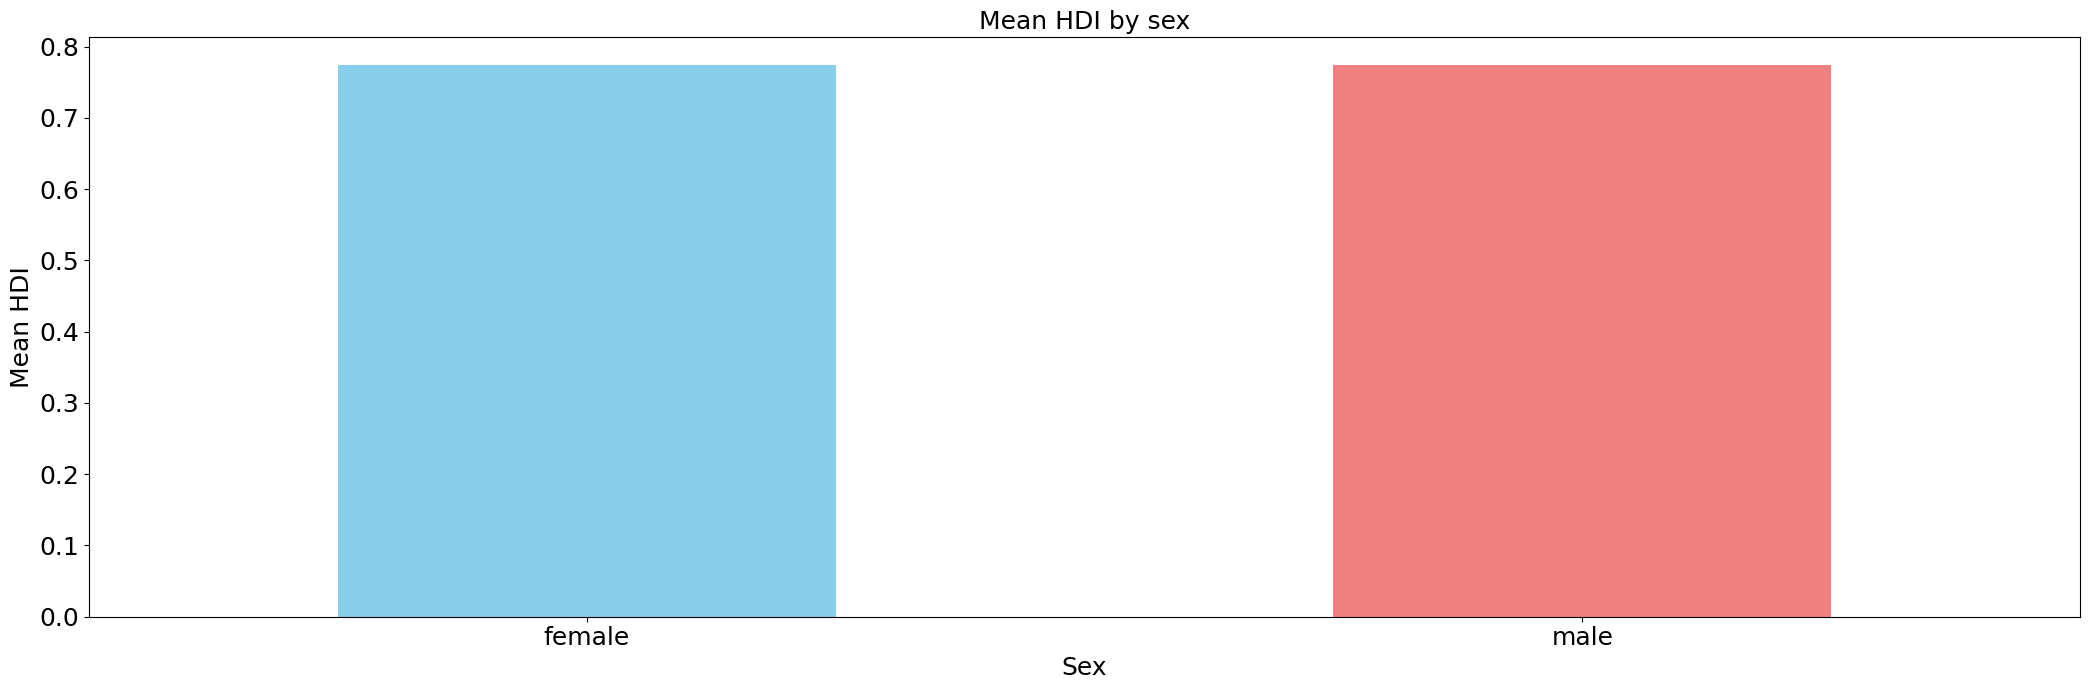

In [16]:
hdi_by_sex = df.groupby(['sex'])['HDI for year'].mean()

# Plot 
plt.figure(figsize=(21, 7))
hdi_by_sex.plot(kind='bar', color=['skyblue', 'lightcoral'], fontsize=18)
plt.title("Mean HDI by sex", fontsize=18)
plt.ylabel('Mean HDI', fontsize=18)
plt.xlabel('Sex', fontsize=18)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Observations
- Both sexes have almost similar score on HDI

### Generations

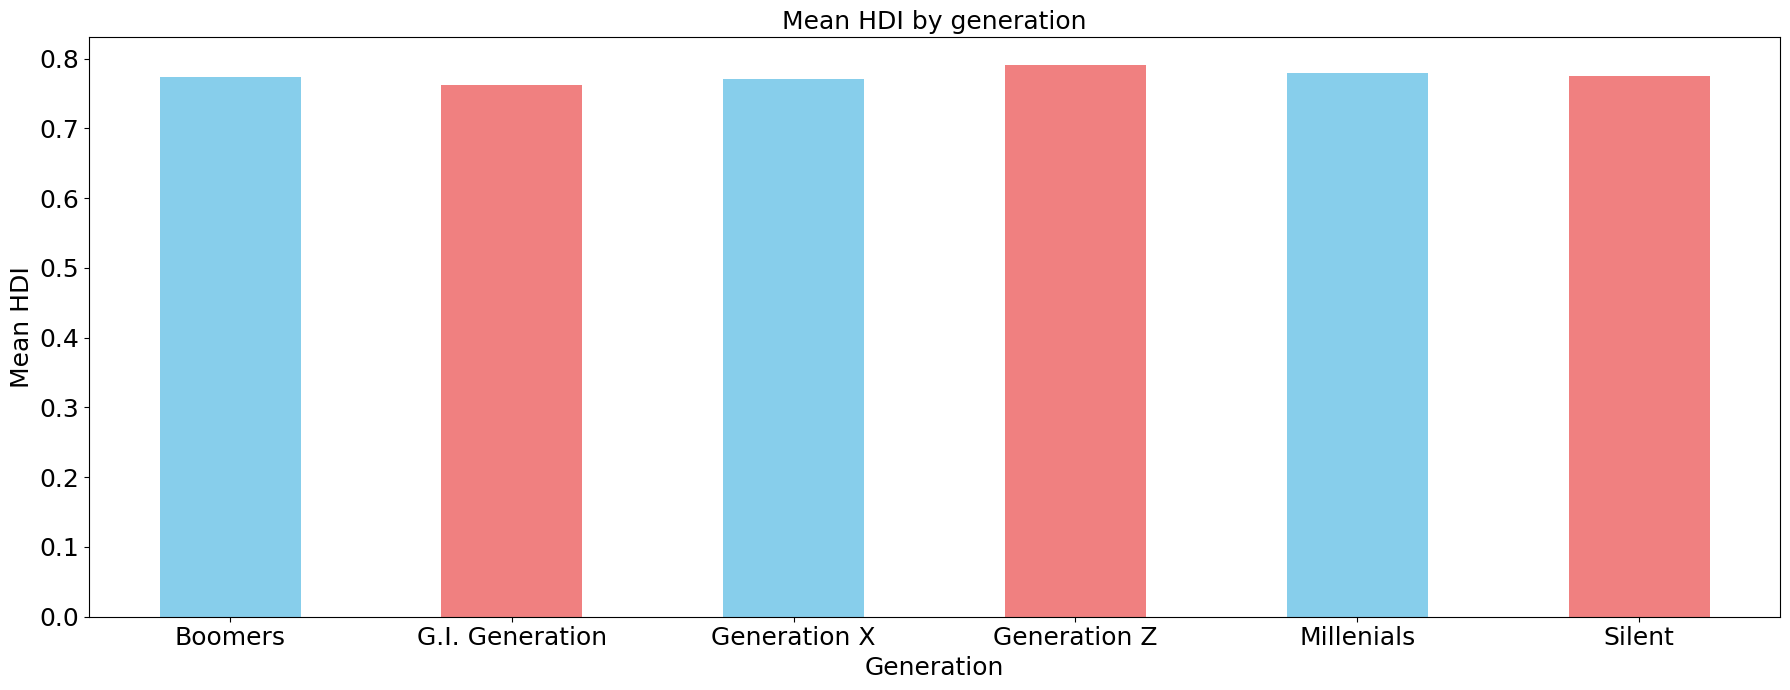

In [17]:
hdi_generation = df.groupby(['generation'])['HDI for year'].mean()

# Plot 
plt.figure(figsize=(18, 7))
hdi_generation.plot(kind='bar', color=['skyblue', 'lightcoral'], fontsize=18)
plt.title("Mean HDI by generation", fontsize=18)
plt.ylabel('Mean HDI', fontsize=18 )
plt.xlabel('Generation', fontsize=18)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Observations
- There is no significant variation in HDI score within the different generations. 

### Age

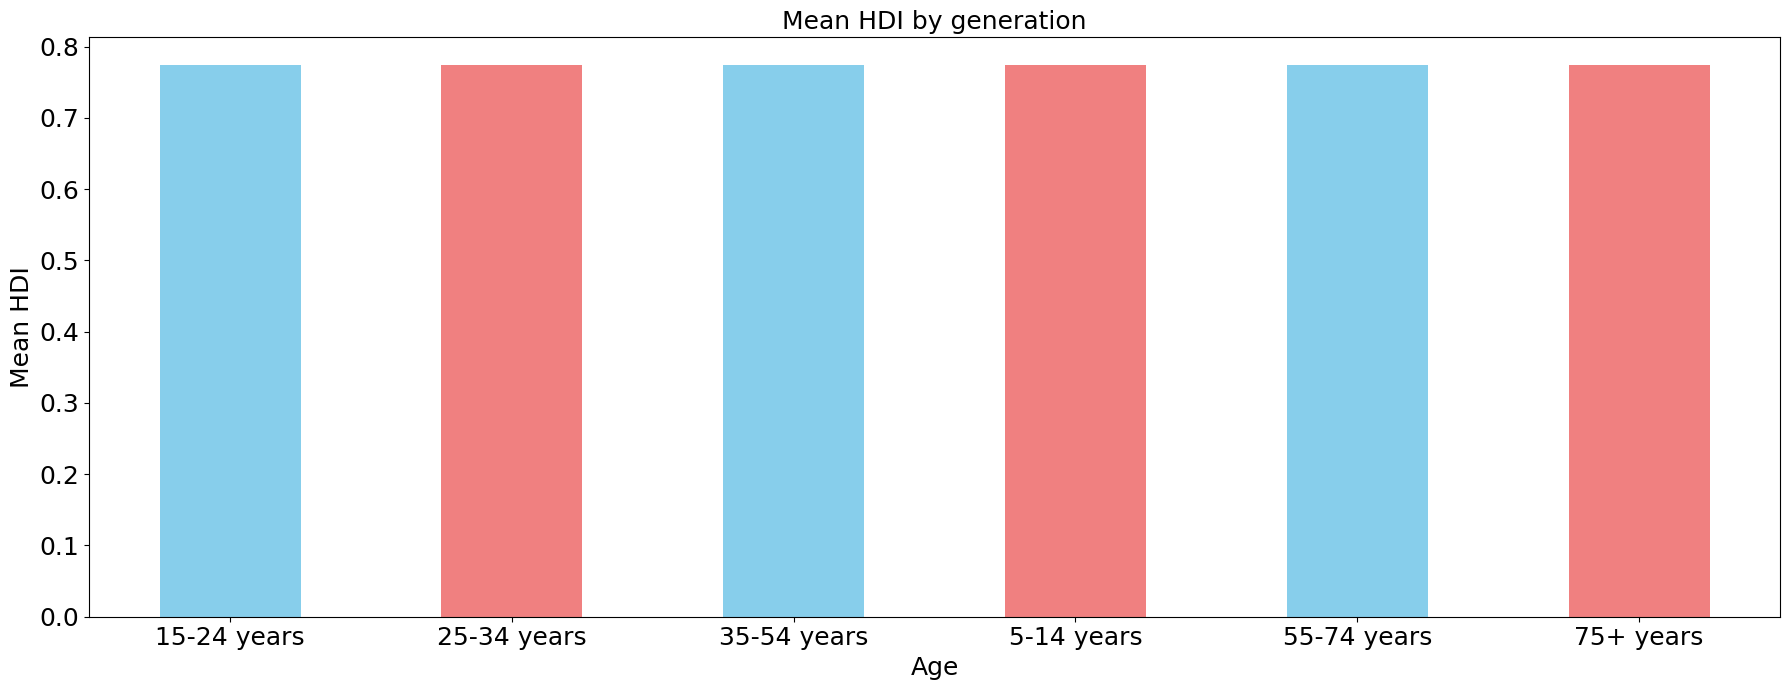

In [18]:
hdi_generation = df.groupby(['age'])['HDI for year'].mean()

# Plot 
plt.figure(figsize=(18, 7))
hdi_generation.plot(kind='bar', color=['skyblue', 'lightcoral'], fontsize=18)
plt.title("Mean HDI by generation", fontsize=18)
plt.ylabel('Mean HDI', fontsize=18 )
plt.xlabel('Age', fontsize=18)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Observations
- There is no significant variation in HDI within the different years. 

### HDI vs Suicide for different continents 

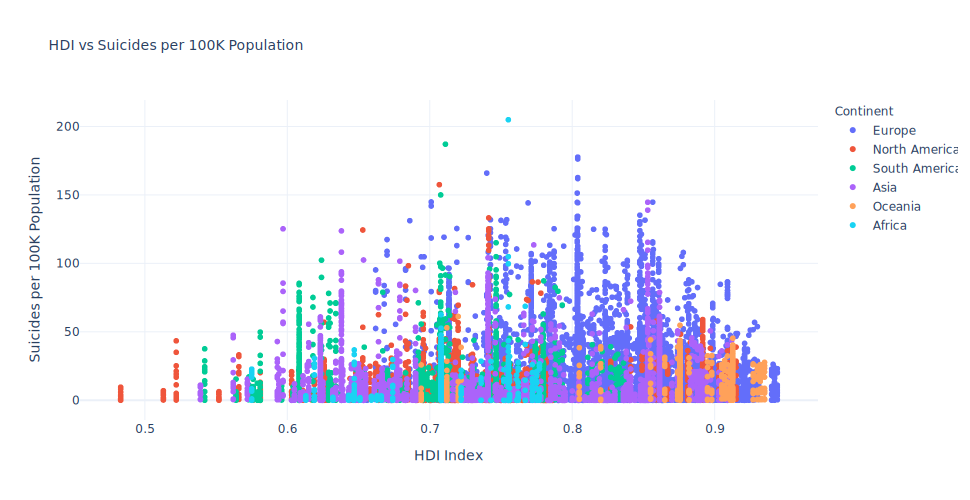

In [19]:
# Drop rows with missing values for 'HDI for year' and 'suicides/100k pop'
filtered_data = df.dropna(subset=['HDI for year', 'suicides/100k pop', 'continent'])

# Scatter plot using Plotly
fig = px.scatter(
    filtered_data,
    x='HDI for year',
    y='suicides/100k pop',
    color='continent',
    #size = 'suicides/100k pop',
    title="HDI vs Suicides per 100K Population",
    labels={
        'HDI for year': 'HDI Index',
        'suicides/100k pop': 'Suicides per 100K Population'
    },
    hover_name='country',  # Optional, if you have a 'country' column for hover info,
    size_max=15,  # Maximum bubble size
)


# Customize the layout
fig.update_layout(
    title_font_size=14,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_text='Continent',
    legend_title_font_size=12,
    legend_font_size=12,
    template='plotly_white'
)
fig.update_layout(
    width=970, 
    height=500,    
)
# Show the plot
fig.show()


### Observations 
- There's a high concentration of data points in the HDI range of 0.7-0.9, suggesting most countries in the dataset are moderately to highly developed
- Europe shows the highest suicide rates overall, with some cases exceeding 150 per 100K population
- Lower HDI countries (below 0.6) generally show lower suicide rates
- Higher HDI doesn't correlate with lower suicide rates

### HDI vs sex comparison 

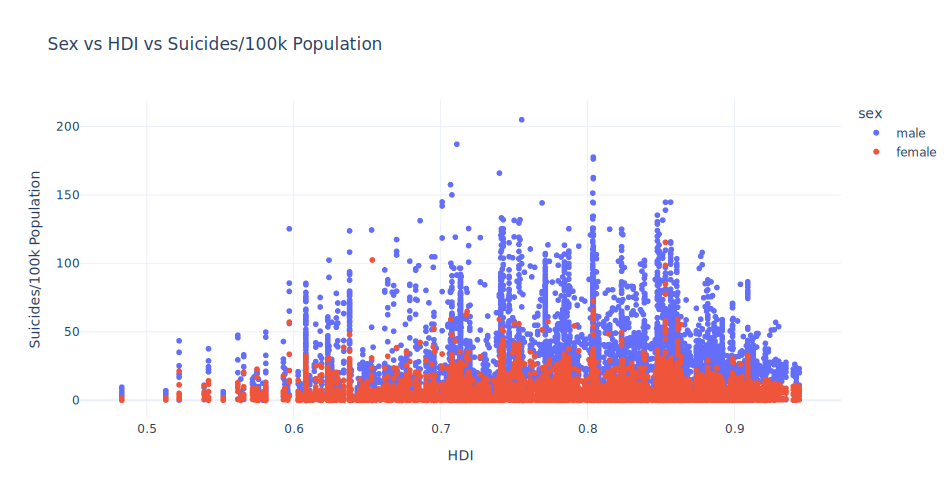

In [20]:


# Drop rows with missing values for required columns

filtered_data = df.dropna(subset=['sex', 'HDI for year', 'suicides/100k pop'])

# Bubble chart using Plotly
fig = px.scatter(
    filtered_data,
    x='HDI for year',
    y='suicides/100k pop',
    color='sex',        
    hover_name='continent',      
    title='Sex vs HDI vs Suicides/100k Population',
    labels={
        'HDI for year': 'HDI',
        'suicides/100k pop': 'Suicides/100k Population',
        'Age': 'Age'
    },
    size_max=15,  # Maximum bubble size
)

# Update layout to vary length and width
fig.update_layout(
    width=950, 
    height=500, 
    template='plotly_white'
)

# Show plot
fig.show()


### Observations 
- Males consistently show significantly higher suicide rates than females across all HDI levels
- The gender gap appears widest in the higher HDI range (0.7-0.9), where male suicide rates can reach over 150/100k while female rates rarely exceed 50/100k
- The highest suicide rates for both genders occur in countries with higher HDI (>0.7), challenging the assumption that development necessarily reduces suicide risk

## GDP per Capita 

### Generation

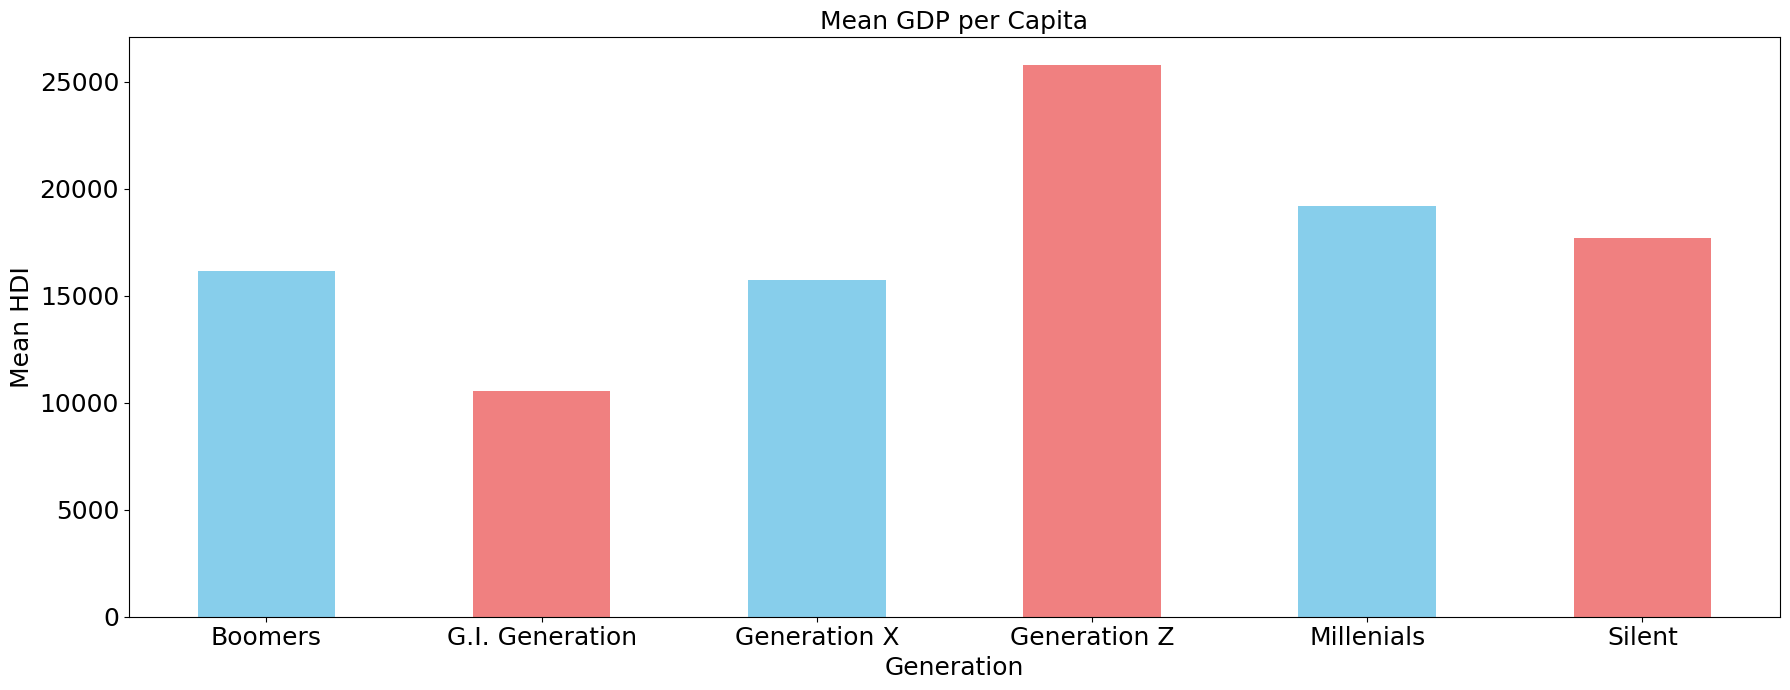

In [21]:
gen_gdp = df.groupby(['generation'])['gdp_per_capita ($)'].mean()

# Plot 
plt.figure(figsize=(18, 7))
gen_gdp.plot(kind='bar', color=['skyblue', 'lightcoral'], fontsize=18)
plt.title("Mean GDP per Capita", fontsize=18)
plt.ylabel('Mean HDI', fontsize=18 )
plt.xlabel('Generation', fontsize=18)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Observations 
- Generation Z shows significantly higher mean GDP per capita (around 25,000) compared to all other generations
- G.I. Generation has the lowest GDP per capita (around 10,000), less than half of Gen Z's
- Most other generations (Boomers, Gen X, Millennials, Silent) cluster around 15,000-19,000 GDP per capita

### Age

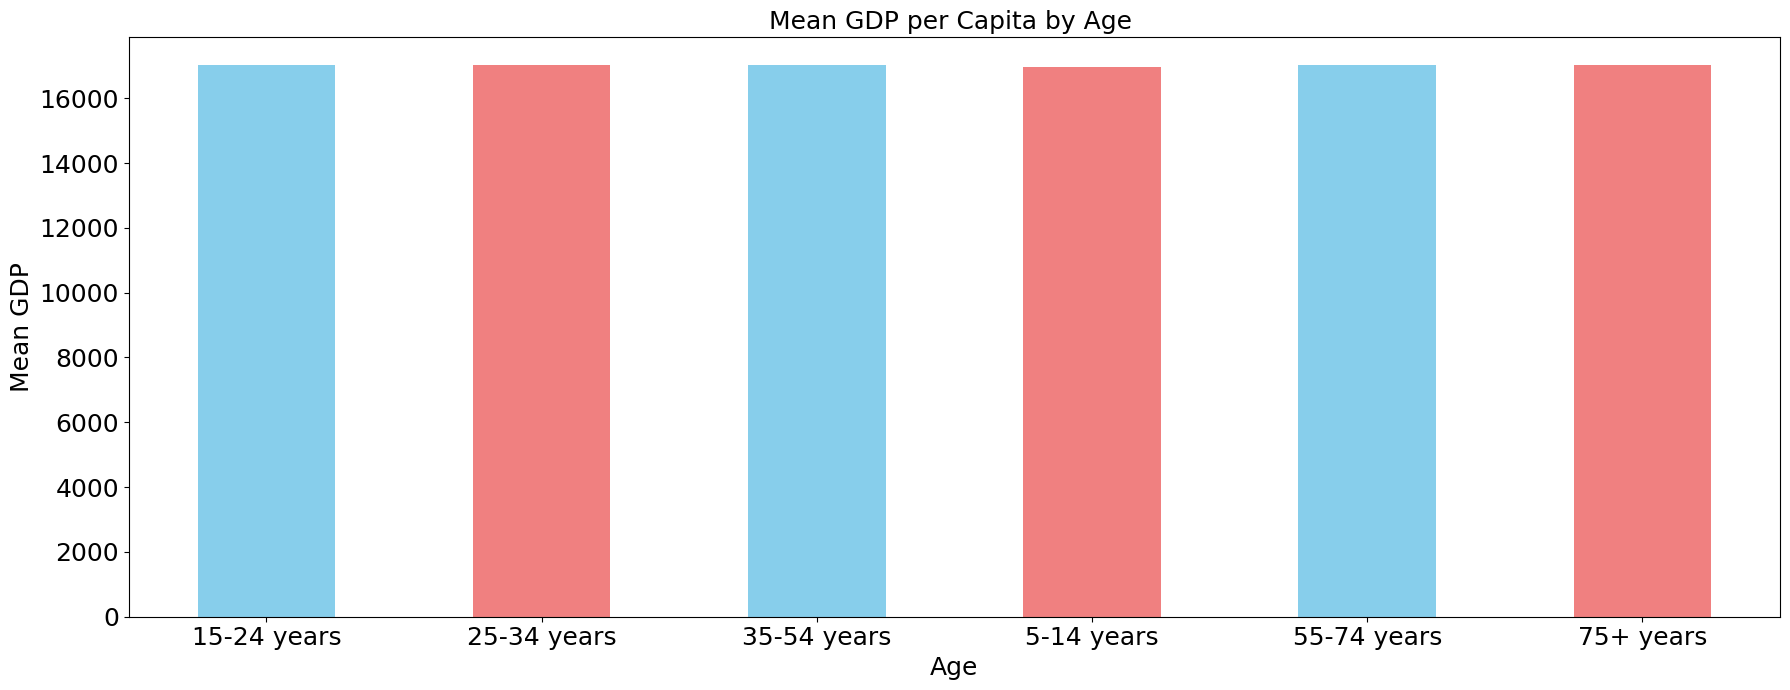

In [22]:
age_gdp = df.groupby(['age'])['gdp_per_capita ($)'].mean()

# Plot 
plt.figure(figsize=(18, 7))
age_gdp.plot(kind='bar', color=['skyblue', 'lightcoral'], fontsize=18)
plt.title("Mean GDP per Capita by Age ", fontsize=18)
plt.ylabel('Mean GDP', fontsize=18 )
plt.xlabel('Age', fontsize=18)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Observations
- The mean GDP per capita is remarkably consistent across all age groups, hovering around 16,000-17,000


### GDP per Capita vs Suicide  per 100k Population

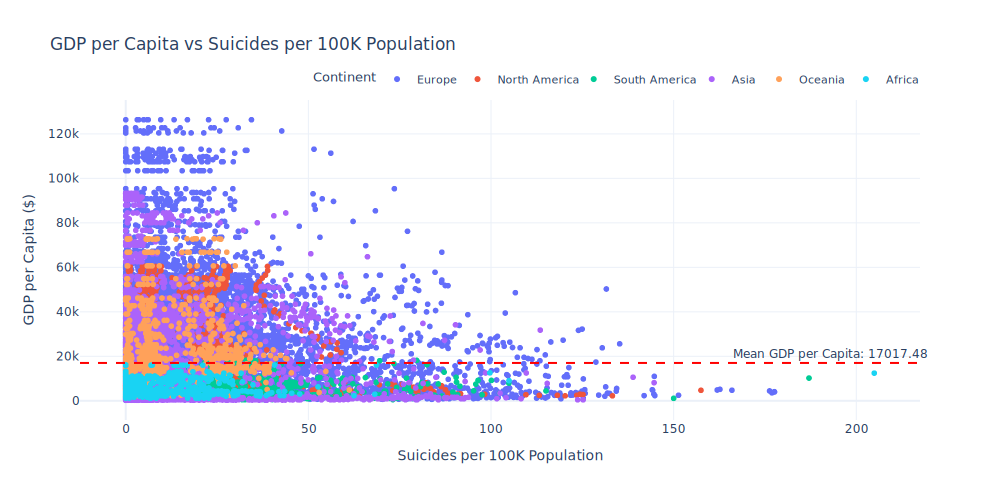

In [23]:
import plotly.express as px

# Calculate the mean GDP per Capita
mean_gdp = df['gdp_per_capita ($)'].mean()

# Create a scatter plot using Plotly Express
fig = px.scatter(
    df,
    x='suicides/100k pop',
    y='gdp_per_capita ($)',
    color='continent',
    title="GDP per Capita vs Suicides per 100K Population",
    labels={
        'suicides/100k pop': 'Suicides per 100K Population',
        'gdp_per_capita ($)': 'GDP per Capita ($)'
    },
    hover_name='country'  # Optional: Add hover info if country column exists
)

# Add a horizontal line for the mean GDP per Capita using `update_traces`
fig.add_hline(
    y=mean_gdp,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Mean GDP per Capita: {mean_gdp:.2f}",
    annotation_position="top right"
)

# Customize layout
fig.update_layout(
    legend_title_text='Continent',
    legend_font_size=11,
    width=1000, 
    height=500,
    template = 'plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Show the plot
fig.show()


### Observations 
- There's a notable negative correlation between GDP per capita and suicide rates - as suicide rates increase, GDP per capita tends to decrease.
- The distribution shows a heavy concentration of data points below 50 suicides per 100K population, with GDP values ranging widely from 0-120K per capita. This suggests that extreme suicide rates (>100 per 100K) are relatively rare regardless of economic conditions.
- European countries (blue dots) show the widest spread across both dimensions, while African countries (light blue dots) cluster in the lower GDP range with generally lower suicide rates. 

### Generation and GDP per capita in suicide rates

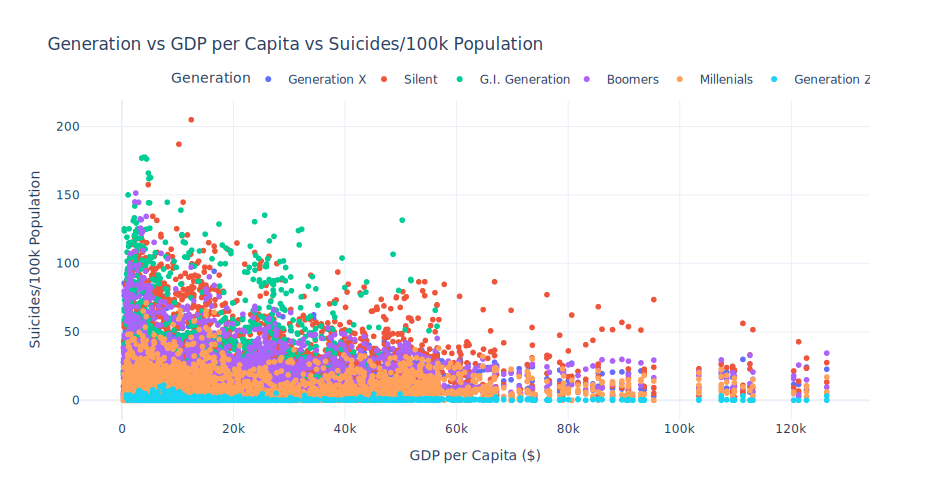

In [24]:
# Drop rows with missing values for required columns
filtered_data = df.dropna(subset=['generation', 'gdp_per_capita ($)', 'suicides/100k pop'])

# Bubble chart using Plotly
fig = px.scatter(
    filtered_data,
    x='gdp_per_capita ($)',
    y='suicides/100k pop',
    color='generation',        # Bubble color by generation
    hover_name='continent',      # Show country on hover
    title='Generation vs GDP per Capita vs Suicides/100k Population',
    labels={
        'gdp_per_capita ($)': 'GDP per Capita ($)',
        'suicides/100k pop': 'Suicides/100k Population',
        'generation': 'Generation'
    },
    size_max=25,  # Maximum bubble size
)

# Update layout to vary length and width
fig.update_layout(
    width=950, 
    height=500, 
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Show plot
fig.show()


### Observations
- Silent and G.I. generations show the highest suicide rates (reaching 150-200 per 100k), particularly in lower GDP regions, while Generation Z and Millennials consistently show lower rates across all GDP levels.
- There's a clear negative correlation - suicide rates tend to decrease as GDP per capita increases, most visible in the downward trend from 0-60k GDP range.
- Data points become more sparse above 80k GDP per capita, but maintain the generational pattern with older generations (Silent, G.I.) showing higher rates than younger ones.

## Comparing suicide rates against Age and GDP per capita 

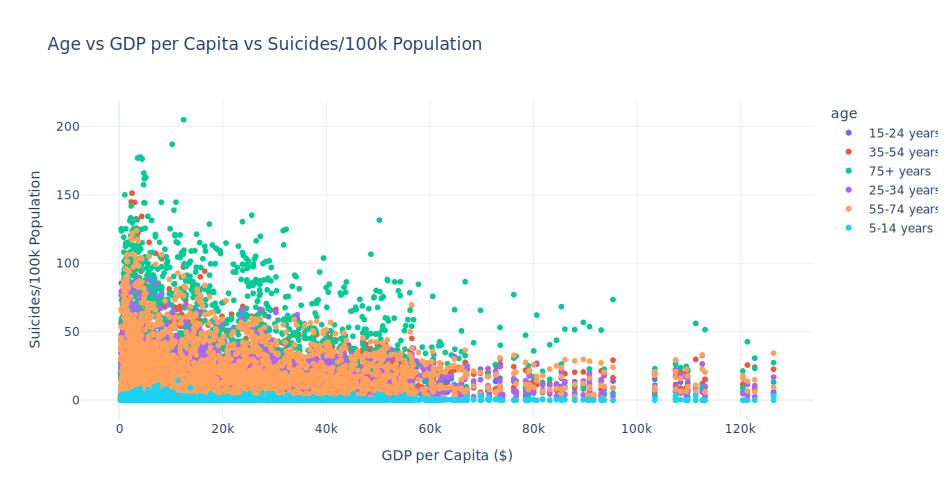

In [25]:


# Drop rows with missing values for required columns
filtered_data = df.dropna(subset=['age', 'gdp_per_capita ($)', 'suicides/100k pop'])

# Bubble chart using Plotly
fig = px.scatter(
    filtered_data,
    x='gdp_per_capita ($)',
    y='suicides/100k pop',
    color='age',        
    hover_name='continent',      
    title='Age vs GDP per Capita vs Suicides/100k Population',
    labels={
        'gdp_per_capita ($)': 'GDP per Capita ($)',
        'suicides/100k pop': 'Suicides/100k Population',
        'Age': 'Age'
    },
    size_max=25,  # Maximum bubble size
)

# Update layout to vary length and width
fig.update_layout(
    width=950, 
    height=500, 
    template='plotly_white'
)

# Show plot
fig.show()


### Observations
- Inverse Correlation with GDP: As GDP per capita increases, the rate of suicides per 100k population generally tends to decrease across all age groups, showing a broad trend towards lower suicide rates in wealthier economies.

- The 75+ years age group (green dots) exhibits consistently higher suicide rates, especially in countries with lower GDP per capita, while the 5-14 years group (light blue) shows consistently lower rates compared to other age groups across all GDP levels.

- At higher levels of GDP per capita (above 60k), there is a clustering of points with lower suicide rates across all ages, indicating that economic prosperity might be related to lower suicide incidence with some exceptions.

### Comparing suicide rates against sex and GDP per capita

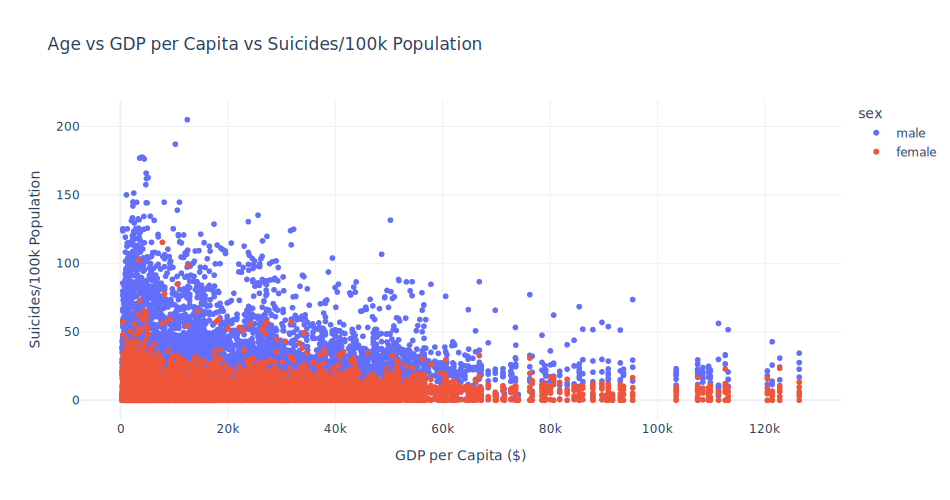

In [26]:
# Drop rows with missing values for required columns
filtered_data = df.dropna(subset=['sex', 'gdp_per_capita ($)', 'suicides/100k pop'])

# Bubble chart using Plotly
fig = px.scatter(
    filtered_data,
    x='gdp_per_capita ($)',
    y='suicides/100k pop',
    color='sex',        
    hover_name='continent',      
    title='Age vs GDP per Capita vs Suicides/100k Population',
    labels={
        'gdp_per_capita ($)': 'GDP per Capita ($)',
        'suicides/100k pop': 'Suicides/100k Population',
        'sex': 'sex'
    },
    size_max=25,  # Maximum bubble size
)

# Update layout to vary length and width
fig.update_layout(
    width=950, 
    height=500, 
    template='plotly_white'
)

# Show plot
fig.show()


### Observations 
- Across almost all levels of GDP per capita, the rate of suicides per 100k population is consistently higher for males (blue dots) compared to females (red dots). This disparity is particularly notable at lower GDP levels.

- While male suicide rates are generally higher, the gap between male and female suicide rates tends to narrow as GDP per capita increases. At the highest levels of GDP, there's more overlap between male and female data points than at lower levels, suggesting that economic factors might have a different impact across genders.

- Both males and females exhibit a general trend where suicide rates decrease as GDP per capita increases. However, the slope of this decline is more pronounced for males.

## GDP and suicide rates over years

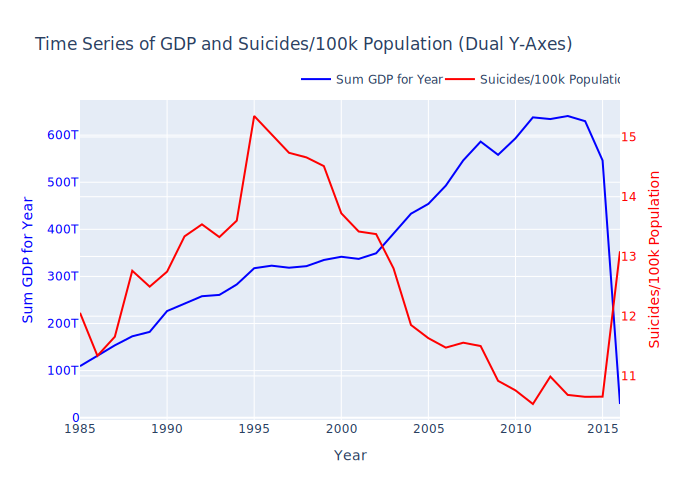

In [27]:
# Group data by year and calculate the sum of GDP and the mean of suicides/100k pop
aggregated_data = df.groupby('year').agg({
    'gdp_for_year ($)': 'sum',  # Sum of GDP for each year
    'suicides/100k pop': 'mean'  # Mean suicides/100k pop for each year
}).reset_index()

# Rename columns for clarity
aggregated_data.rename(columns={'gdp_for_year ($)': 'Sum GDP for Year'}, inplace=True)

# Create the figure
fig = go.Figure()

# Add GDP trace
fig.add_trace(
    go.Scatter(
        x=aggregated_data['year'],
        y=aggregated_data['Sum GDP for Year'],
        mode='lines',
        name='Sum GDP for Year',
        line=dict(color='blue')
    )
)

# Add suicides trace (second y-axis)
fig.add_trace(
    go.Scatter(
        x=aggregated_data['year'],
        y=aggregated_data['suicides/100k pop'],
        mode='lines',
        name='Suicides/100k Population',
        line=dict(color='red'),
        yaxis='y2'
    )
)

# Update layout for dual y-axes
fig.update_layout(
    title='Time Series of GDP and Suicides/100k Population (Dual Y-Axes)',
    xaxis_title='Year',
    yaxis=dict(
        title='Sum GDP for Year',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Suicides/100k Population',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show()


### Observation 
- There's a striking inverse relationship after 2000 - as GDP steadily rises, suicide rates consistently decline, contradicting the pattern from earlier years.

- A dramatic spike in suicide rates occurs around 1995 (reaching ~15 per 100k), followed by a sharp decline over subsequent years.

- The GDP shows steady growth from 1985-2010, then plateaus and shows a sharp decline in 2015, while suicide rates reach their lowest point (~11 per 100k) during this period.

### Year-over-year percentage change in GDP on suicide rates

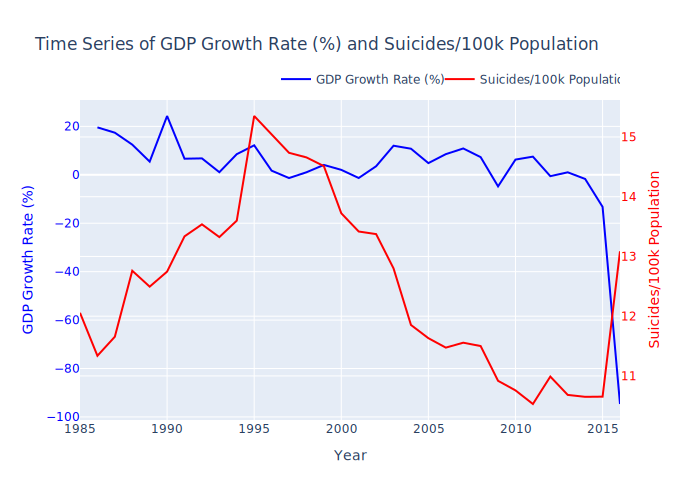

In [28]:

# Group data by year and calculate the sum of GDP and the mean of suicides/100k pop
aggregated_data = df.groupby('year').agg({
    'gdp_for_year ($)': 'sum',  # Sum of GDP for each year
    'suicides/100k pop': 'mean'  # Mean suicides/100k pop for each year
}).reset_index()

# Rename columns for clarity
aggregated_data.rename(columns={'gdp_for_year ($)': 'Sum GDP for Year'}, inplace=True)

# Calculate GDP Growth Rate (%) - Year-over-year percentage change
aggregated_data['GDP Growth Rate (%)'] = aggregated_data['Sum GDP for Year'].pct_change() * 100

# Create the figure
fig = go.Figure()

# Add GDP Growth Rate trace
fig.add_trace(
    go.Scatter(
        x=aggregated_data['year'],
        y=aggregated_data['GDP Growth Rate (%)'],
        mode='lines',
        name='GDP Growth Rate (%)',
        line=dict(color='blue')
    )
)

# Add suicides trace (second y-axis)
fig.add_trace(
    go.Scatter(
        x=aggregated_data['year'],
        y=aggregated_data['suicides/100k pop'],
        mode='lines',
        name='Suicides/100k Population',
        line=dict(color='red'),
        yaxis='y2'
    )
)

# Update layout for dual y-axes
fig.update_layout(
    title='Time Series of GDP Growth Rate (%) and Suicides/100k Population',
    xaxis_title='Year',
    yaxis=dict(
        title='GDP Growth Rate (%)',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Suicides/100k Population',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show()


### Observation 
- From 1985 to the mid-1990s, the suicide rate and GDP growth rate show an inverse relationship with some notable peaks in suicide rate.

- After the mid-1990s, the inverse correlation seems to weaken. GDP growth rate fluctuates and generally stabilizes to positive values, the suicide rate continues a sustained decline, suggesting that other factors might have started to influence suicide rates independent of short-term fluctuations in GDP growth.

- Around 2015, there is a steep decline in the suicide rate, which corresponds with a slight decrease in GDP growth rate. 

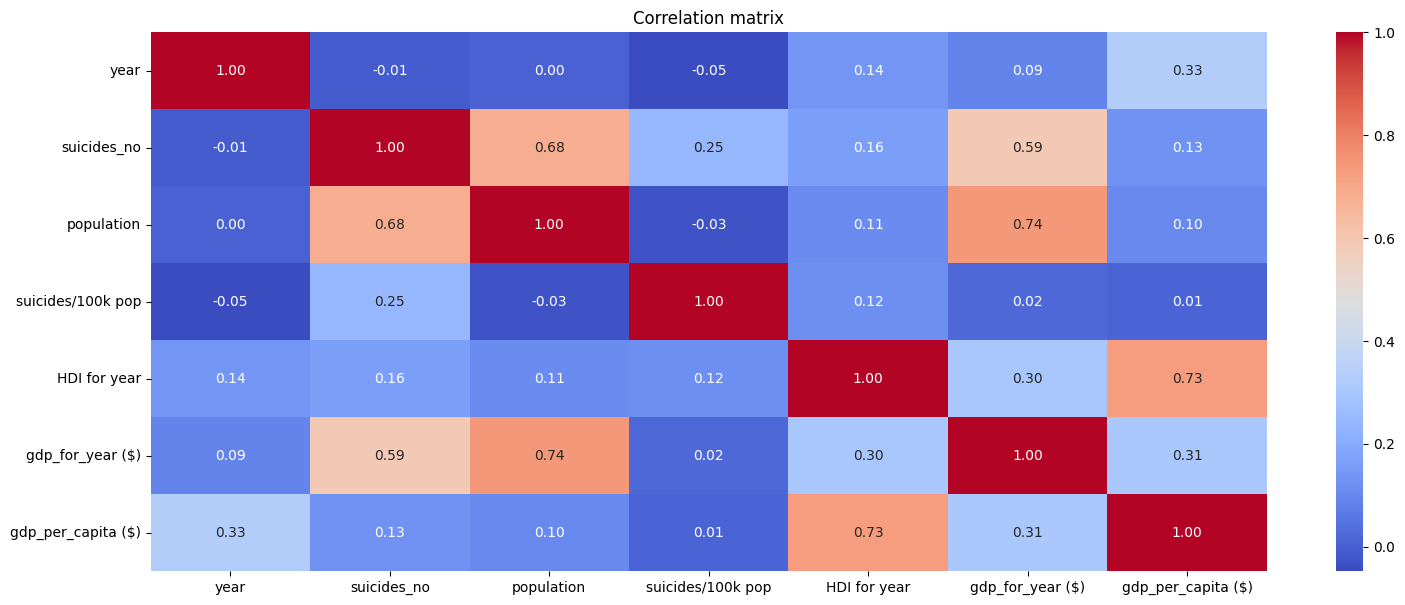

In [29]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix 
corr_matrix = df[numeric_columns].corr()

# Plot 
plt.figure(figsize=(18, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

### Average suicide rates per 100k population in different countries

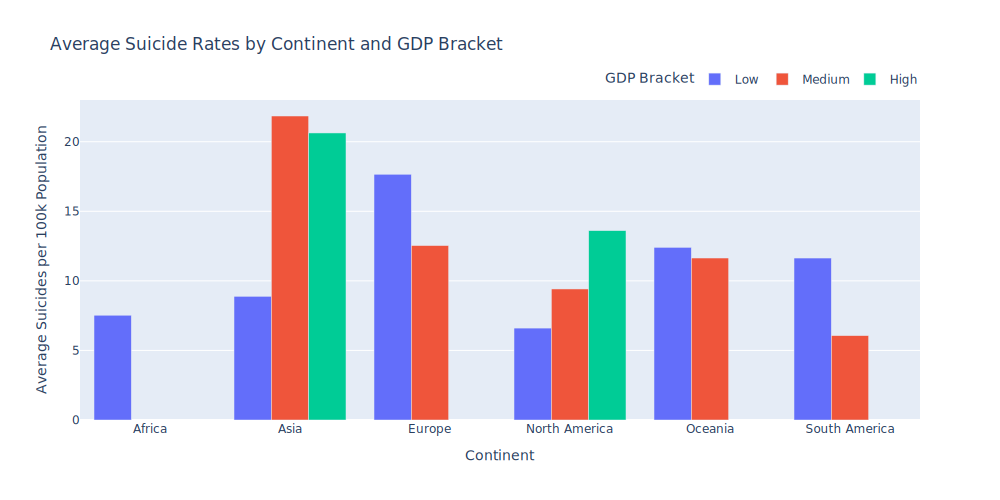

In [30]:
# Fill missing GDP values
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].fillna(0)

# Define GDP ranges and labels
bins = [-float('inf'), 1e+12, 5e+12, float('inf')]
labels = ['Low', 'Medium', 'High']

# Add GDP bracket column
df['GDP Bracket'] = pd.cut(df['gdp_for_year ($)'], bins=bins, labels=labels, include_lowest=True)

# Group by continent and GDP bracket, then calculate the average suicide rates
continent_gdp_analysis = (
    df.groupby(['continent', 'GDP Bracket'], observed=True)['suicides/100k pop']
    .mean()
    .reset_index()  )

# Create the Plotly bar chart
fig = px.bar(
    continent_gdp_analysis,
    x='continent',
    y='suicides/100k pop',
    color='GDP Bracket',
    title='Average Suicide Rates by Continent and GDP Bracket',
    labels={
        'suicides/100k pop': 'Average Suicides per 100k Population',
        'continent': 'Continent',
        'GDP Bracket': 'GDP Bracket'
    },
    barmode='group',  # Group bars by GDP bracket
    height=600
)

# Customize the layout
fig.update_layout(
    xaxis_title='Continent',
    yaxis_title='Average Suicides per 100k Population',
    legend_title='GDP Bracket',
    xaxis_tickangle=0,
    height=500,
    width=1000,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Show the plot
fig.show()

### Observations 
- Asia has the highest average suicide rates, especially in the medium GDP bracket, and slightly lower but still significant in the high GDP bracket.

- Most continents show a trend where higher GDP brackets tend to have lower suicide rates, though the rate still increases from Low to Medium GDP.

- Africa consistently shows the lowest average suicide rates compared to other continents across all GDP brackets.